## Install Libraries

In [614]:
!pip install -q pandas

In [615]:
!pip install -q matplotlib

In [616]:
!pip install -q seaborn

## Import Libraries

In [617]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [618]:
from sklearn.linear_model import LinearRegression

In [619]:
from sklearn.model_selection import train_test_split

In [620]:
import pandas as pd

In [621]:
import matplotlib.pyplot as plt

In [622]:
import seaborn as sns

In [623]:
import math

## Constants

In [624]:
dataset_path = 'D:\\Docs\\Ptit\\IYear4\\HTTM\\BTL\\DuDoanGiaRau\\data.csv'

## Datasets

In [625]:
df = pd.read_csv(dataset_path)

In [626]:
df.shape

(5113, 7)

In [627]:
df.head()

,ngay,do_am,nhiet_do,luong_mua,gia_xang,gia_phan_bon,gia
0,01-01-2010,91,10.805887,63.033385,16005.169509,5000.683789,8402.276375
1,02-01-2010,80,19.539325,80.645325,16010.039932,5001.449544,8918.377799
2,03-01-2010,46,13.503100,63.831273,16014.533004,5003.270674,7804.712212
3,04-01-2010,32,11.889119,43.181416,16014.977636,5003.404962,6835.474441
4,05-01-2010,57,17.038747,75.595450,16019.768898,5003.831277,8656.994362


In [628]:
df.describe()

,do_am,nhiet_do,luong_mua,gia_xang,gia_phan_bon,gia
count,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000
mean,55.272443,24.520863,55.394919,21322.252476,6492.837177,8442.620761
std,26.245700,8.115348,25.636649,3337.265190,930.322329,1837.637267
min,10.000000,10.016265,10.008670,16005.169509,5000.683789,3797.510607
25%,32.000000,17.499891,33.384526,18375.125551,5680.275480,7080.449212
50%,56.000000,23.732832,55.634995,21036.265576,6401.231068,8439.854837
75%,78.000000,31.997197,77.313309,24276.409892,7255.437440,9826.132329
max,100.000000,37.995620,99.989375,27334.292868,8292.533475,13144.634027


In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5113 entries, 0 to 5112
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ngay          5113 non-null   object 
 1   do_am         5113 non-null   int64  
 2   nhiet_do      5113 non-null   float64
 3   luong_mua     5113 non-null   float64
 4   gia_xang      5113 non-null   float64
 5   gia_phan_bon  5113 non-null   float64
 6   gia           5113 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 279.7+ KB


In [630]:
df.nunique()

ngay            5113
do_am             91
nhiet_do        5113
luong_mua       5113
gia_xang        5113
gia_phan_bon    5113
gia             5113
dtype: int64

In [631]:
df.columns

Index(['ngay', 'do_am', 'nhiet_do', 'luong_mua', 'gia_xang', 'gia_phan_bon',
       'gia'],
      dtype='object')

## Data Preprocessing

<Axes: xlabel='do_am', ylabel='gia'>

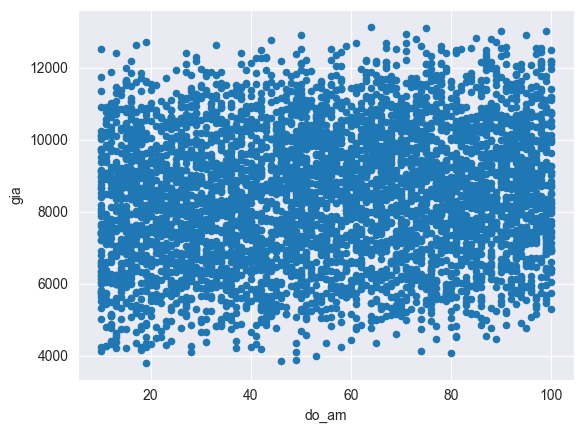

In [632]:
df.plot(x='do_am', y='gia', kind='scatter')

<Axes: xlabel='nhiet_do', ylabel='gia'>

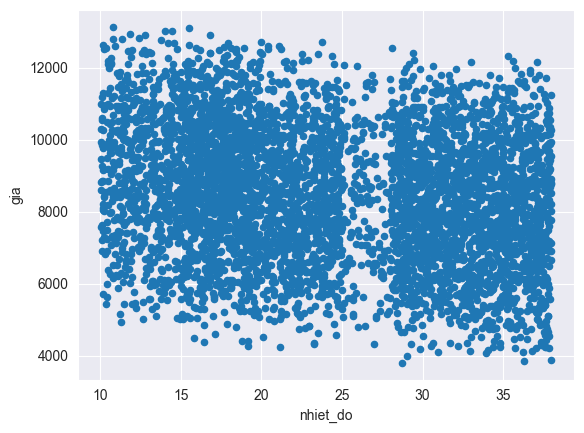

In [633]:
df.plot(x='nhiet_do', y='gia', kind='scatter')

<Axes: xlabel='luong_mua', ylabel='gia'>

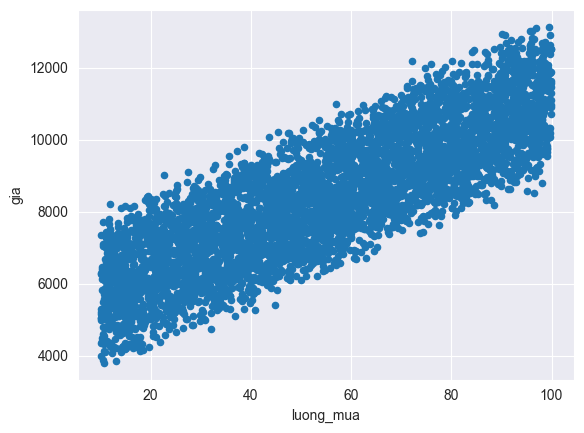

In [634]:
df.plot(x='luong_mua', y='gia', kind='scatter')

<Axes: xlabel='gia_xang', ylabel='gia'>

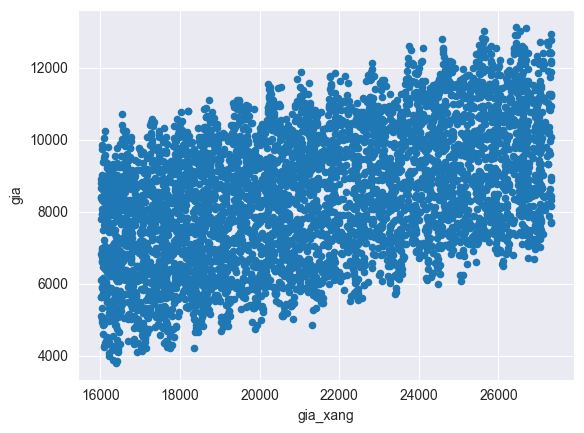

In [635]:
df.plot(x='gia_xang', y='gia', kind='scatter')

<Axes: xlabel='gia_phan_bon', ylabel='gia'>

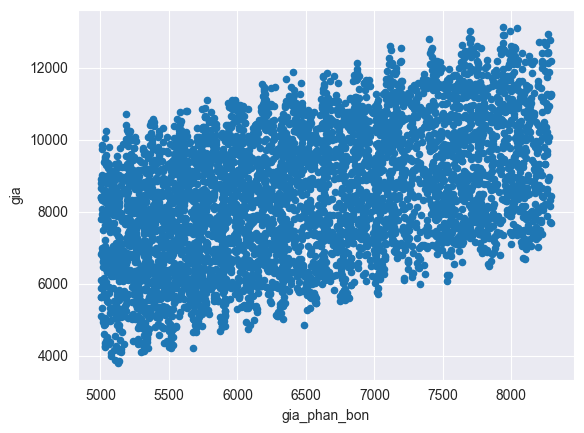

In [636]:
df.plot(x='gia_phan_bon', y='gia', kind='scatter')

## Model Training

### Giá Xăng

In [637]:
new_df = df[['gia_xang', 'gia']]
new_df

,gia_xang,gia
0,16005.169509,8402.276375
1,16010.039932,8918.377799
2,16014.533004,7804.712212
3,16014.977636,6835.474441
4,16019.768898,8656.994362
...,...,...
5108,27326.192062,11258.671141
5109,27323.766564,8443.504116
5110,27330.000045,7697.703480
5111,27331.052569,12193.976601


In [638]:
x = new_df[['gia_xang']]
y = new_df['gia']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(x_train.values.reshape(-1, 1), y_train)
coef_gia_xang = model.coef_[0]
coef_gia_xang

np.float64(0.2736738391054159)

In [639]:
model.intercept_

np.float64(2620.38672756958)

In [640]:
# make predictions using test data
y_pred = model.predict(x_test.values.reshape(-1, 1))

In [641]:
mse_gia_xang = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_gia_xang)

Mean Squared Error: 2519349.380522573


In [642]:
rmse_gia_xang = math.sqrt(mse_gia_xang)
print("Root Mean Squared Error:", rmse_gia_xang)

Root Mean Squared Error: 1587.2458475367239


In [643]:
mae_gia_xang = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_gia_xang)

Mean Absolute Error: 1361.2256419316125


In [644]:
r2_gia_xang = r2_score(y_test, y_pred)
print("R2 Score:", r2_gia_xang)

R2 Score: 0.2152536062633843


<Axes: xlabel='gia_xang', ylabel='gia'>

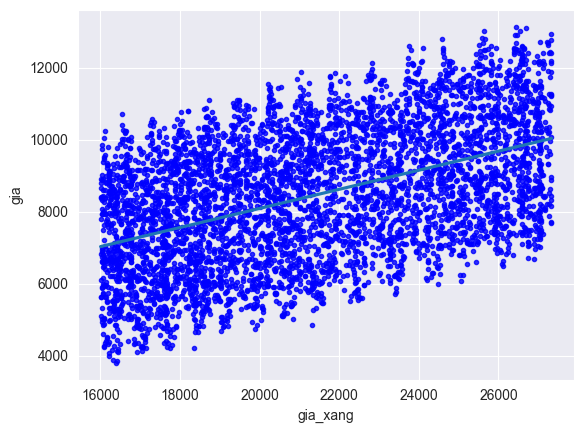

In [645]:
sns.regplot(x=x, y=y, ci=None, scatter_kws={'color': 'blue', 's': 9})

### Giá Phân Bón

In [646]:
new_df = df[['gia_phan_bon', 'gia']]
x = new_df[['gia_phan_bon']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
coef_gia_phan_bon = model.coef_[0]
coef_gia_phan_bon

np.float64(0.9806875839251938)

In [647]:
mse_gia_phan_bon = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_gia_phan_bon)

Mean Squared Error: 2526910.958067833


In [648]:
rmse_gia_phan_bon = math.sqrt(mse_gia_phan_bon)
print("Root Mean Squared Error:", rmse_gia_phan_bon)

Root Mean Squared Error: 1589.626043466775


In [649]:
mae_gia_phan_bon = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_gia_phan_bon)

Mean Absolute Error: 1363.0435732237663


In [650]:
r2_gia_phan_bon = r2_score(y_test, y_pred)
print("R2 Score:", r2_gia_phan_bon)

R2 Score: 0.2128982677162662


<Axes: xlabel='gia_phan_bon', ylabel='gia'>

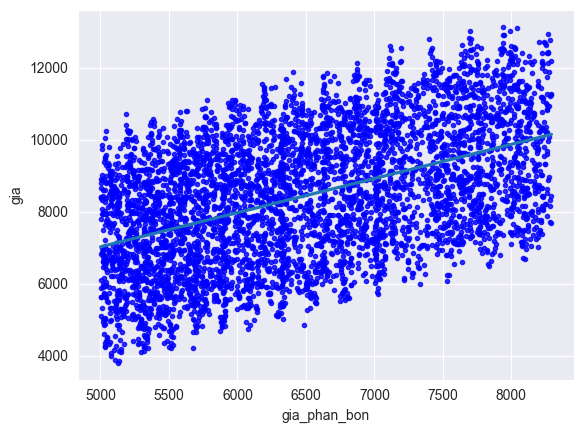

In [651]:
sns.regplot(x=x, y=y, ci=None, scatter_kws={'color': 'blue', 's': 9})

### Độ Ẩm

In [652]:
new_df = df[['do_am', 'gia']]
x = new_df[['do_am']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
coef_do_am = model.coef_[0]
coef_do_am

np.float64(6.968736859016455)

In [653]:
mse_do_am = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_do_am)

Mean Squared Error: 3125893.39243079


In [654]:
rmse_do_am = math.sqrt(mse_do_am)
print("Root Mean Squared Error:", rmse_do_am)

Root Mean Squared Error: 1768.0196244473052


In [655]:
mae_do_am = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_do_am)

Mean Absolute Error: 1456.8899873190808


In [656]:
r2_do_am = r2_score(y_test, y_pred)
print("R2 Score:", r2_do_am)

R2 Score: 0.026322595079543598


<Axes: xlabel='do_am', ylabel='gia'>

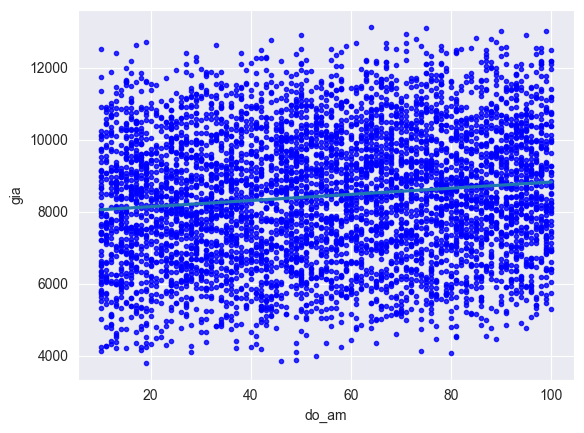

In [657]:
sns.regplot(x=x, y=y, ci=None, scatter_kws={'color': 'blue', 's': 9})

### Nhiệt Độ

In [658]:
new_df = df[['nhiet_do', 'gia']]
x = new_df[['nhiet_do']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
coef_nhiet_do = model.coef_[0]
coef_nhiet_do

np.float64(-49.57108715574695)

In [659]:
mse_nhiet_do = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_nhiet_do)

Mean Squared Error: 3060966.251134737


In [660]:
rmse_nhiet_do = math.sqrt(mse_nhiet_do)
print("Root Mean Squared Error:", rmse_nhiet_do)

Root Mean Squared Error: 1749.561731158617


In [661]:
mae_nhiet_do = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_nhiet_do)

Mean Absolute Error: 1443.8696369407303


In [662]:
r2_nhiet_do = r2_score(y_test, y_pred)
print("R2 Score:", r2_nhiet_do)

R2 Score: 0.04654660227029561


<Axes: xlabel='nhiet_do', ylabel='gia'>

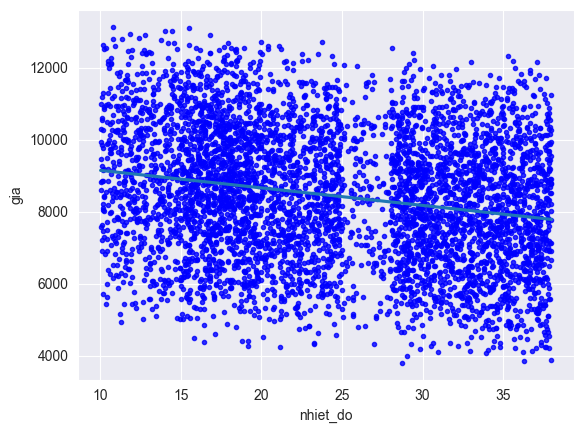

In [663]:
sns.regplot(x=x, y=y, ci=None, scatter_kws={'color': 'blue', 's': 9})

### Lượng Mưa

In [664]:
new_df = df[['luong_mua', 'gia']]
x = new_df[['luong_mua']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
coef_luong_mua = model.coef_[0]
coef_luong_mua

np.float64(60.84420687858113)

In [665]:
mse_luong_mua = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_luong_mua)

Mean Squared Error: 1031717.4573749113


In [666]:
rmse_luong_mua = math.sqrt(mse_luong_mua)
print("Root Mean Squared Error:", rmse_luong_mua)

Root Mean Squared Error: 1015.7349346039601


In [667]:
mae_luong_mua = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_luong_mua)

Mean Absolute Error: 856.0861421616603


In [668]:
r2_luong_mua = r2_score(y_test, y_pred)
print("R2 Score:", r2_luong_mua)

R2 Score: 0.6786326817989277


<Axes: xlabel='luong_mua', ylabel='gia'>

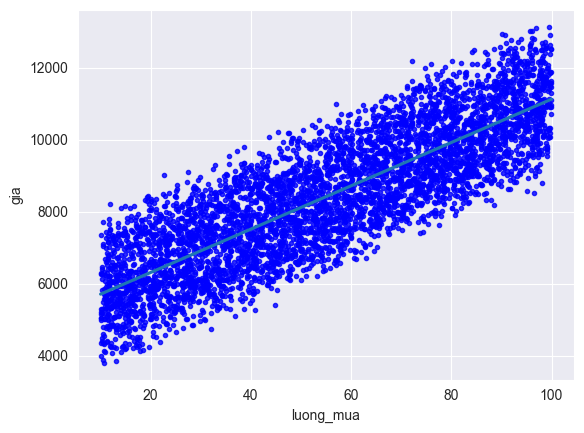

In [669]:
sns.regplot(x=x, y=y, ci=None, scatter_kws={'color': 'blue', 's': 9})

## Model Evaluation

In [670]:
new_df = df.copy()
new_df.loc[:, 'gia_vat_tu'] = r2_gia_xang * coef_gia_xang * new_df['gia_xang'] + r2_gia_phan_bon * coef_gia_phan_bon * \
                              new_df[
                                  'gia_phan_bon'] + r2_do_am * coef_do_am * new_df[
                                  'do_am'] + r2_nhiet_do * coef_nhiet_do * new_df[
                                  'nhiet_do'] + r2_luong_mua * coef_luong_mua * new_df['luong_mua']
new_df = new_df[['gia_vat_tu', 'gia']]
new_df

,gia_vat_tu,gia
0,4581.391858,8402.276375
1,5286.881868,8918.377799
2,4600.950983,7804.712212
3,3749.510681,6835.474441
4,5080.989293,8656.994362
...,...,...
5108,6199.590553,11258.671141
5109,4559.059773,8443.504116
5110,3864.558361,7697.703480
5111,6317.657376,12193.976601


In [671]:
x = new_df[['gia_vat_tu']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
coef_gia_vat_tu = model.coef_[0]
y_pred = model.predict(x_test)

In [672]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 274143.70723929943


In [673]:
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 523.5873444223986


In [674]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 425.07077315987675


In [675]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9133085095635918


<Axes: xlabel='gia_vat_tu', ylabel='gia'>

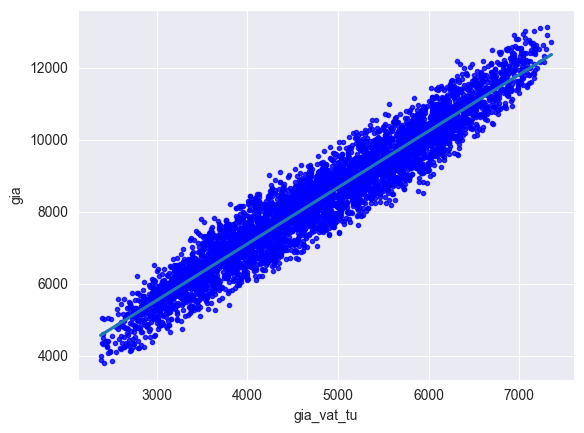

In [676]:
sns.regplot(x=x, y=y, ci=None, scatter_kws={'color': 'blue', 's': 9})

## Solution

Dự Đoán giá rau dựa trên giá xăng và giá phân bón

In [677]:
gia_xang = 16001.483889
gia_phan = 4999.659653
do_am = 80
nhiet_do = 30
luong_mua = 100
gia_vat_tu = r2_gia_xang * coef_gia_xang * gia_xang + r2_gia_phan_bon * coef_gia_phan_bon * gia_phan + r2_do_am * coef_do_am * do_am + r2_nhiet_do * coef_nhiet_do * nhiet_do + r2_luong_mua * coef_luong_mua * luong_mua
gia_rau = coef_gia_vat_tu * gia_vat_tu
print("Giá rau dự đoán:", gia_rau)

Giá rau dự đoán: 9505.830900161038
